In [49]:
# https://www.kaggle.com/competitions/store-sales-time-series-forecasting

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
target_column='sales'

train_df = pd.read_csv('datasets/train.csv.zip')
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [52]:
test_df = pd.read_csv('datasets/test.csv')
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [53]:
transaction_df = pd.read_csv('datasets/transactions.csv.zip')
transaction_df

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [54]:
train_df.groupby(['date', 'store_nbr'])['sales'].sum()

date        store_nbr
2013-01-01  1                0.000000
            2                0.000000
            3                0.000000
            4                0.000000
            5                0.000000
                             ...     
2017-08-15  50           16879.121004
            51           20154.559000
            52           18600.046000
            53            8208.189000
            54           12666.858000
Name: sales, Length: 90936, dtype: float64

In [55]:
daily_sales_store_1 =train_df[(train_df['store_nbr']==1)].groupby(['date'])['sales'].sum()

In [56]:

daily_sales_store_1.index # dtype object

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
       '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14', '2017-08-15'],
      dtype='object', name='date', length=1684)

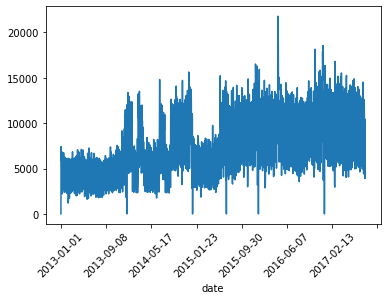

In [57]:
# Plot sales accross time
ax=daily_sales_store_1.plot(rot=45)

In [58]:
train_df.groupby(['date', 'store_nbr'])['sales'].sum().reset_index()

,date,store_nbr,sales
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,3,0.000000
3,2013-01-01,4,0.000000
4,2013-01-01,5,0.000000
...,...,...,...
90931,2017-08-15,50,16879.121004
90932,2017-08-15,51,20154.559000
90933,2017-08-15,52,18600.046000
90934,2017-08-15,53,8208.189000


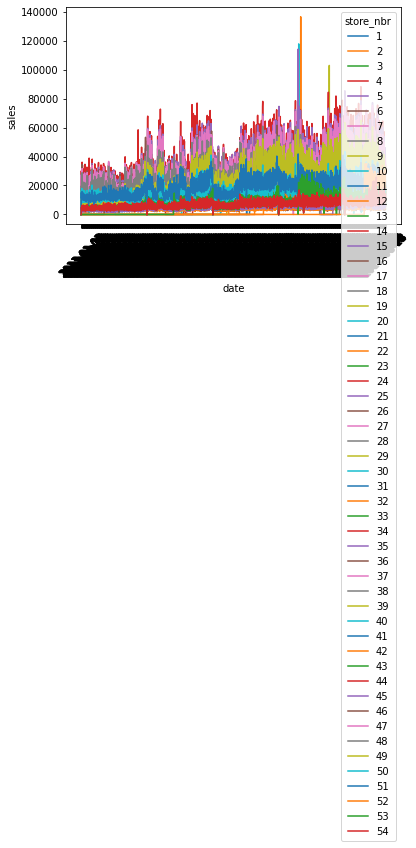

In [59]:
sns.lineplot(data=train_df.groupby(['date', 'store_nbr'])['sales'].sum().reset_index(),
             x='date',
             y='sales',
             palette="tab10",
             hue='store_nbr'
             )
plt.xticks(rotation=45);

<AxesSubplot: xlabel='date'>

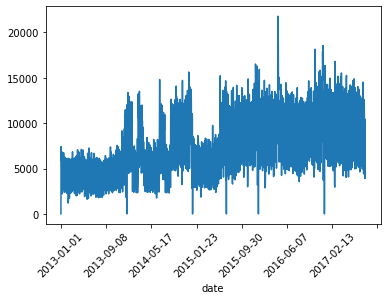

In [60]:
# perform linear regression on time
# https://www.statsmodels.org/devel/generated/statsmodels.tsa.deterministic.DeterministicProcess.html
daily_sales_store_1.plot(rot=45)

In [61]:
daily_sales_store_1.tail()

date
2017-08-11     5403.742021
2017-08-12     7543.623000
2017-08-13     3902.782000
2017-08-14    10433.314000
2017-08-15     9823.551018
Name: sales, dtype: float64

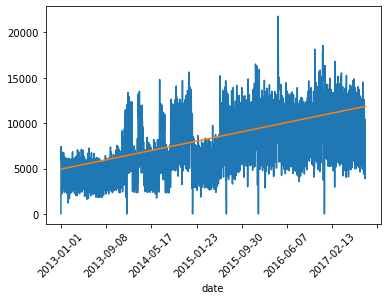

In [62]:
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

daily_sales_store_1 =train_df[(train_df['store_nbr']==1)].groupby(['date'])['sales'].sum()

dp=DeterministicProcess(index=daily_sales_store_1.index, order=1)
X=dp.in_sample()
y=daily_sales_store_1
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

daily_sales_store_1.plot(rot=45)
plt.plot(y_pred)

In [63]:
from sklearn.metrics import mean_squared_log_error

In [64]:
mean_squared_log_error(y_true=daily_sales_store_1, y_pred=y_pred ,squared=False)

0.6662495263814233

In [65]:
dp.out_of_sample(10)

/home/arawn/.local/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,trend
1685,1685.0
1686,1686.0
1687,1687.0
1688,1688.0
1689,1689.0
1690,1690.0
1691,1691.0
1692,1692.0
1693,1693.0
1694,1694.0


In [66]:
# perform linear regression on features
stores_df = pd.read_csv('datasets/stores.csv')
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [67]:
stores_df=stores_df.set_index('store_nbr')
stores_df.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [68]:
stores_df.loc[1]

city           Quito
state      Pichincha
type               D
cluster           13
Name: 1, dtype: object

In [69]:
stores_df.iloc[1]

city           Quito
state      Pichincha
type               D
cluster           13
Name: 2, dtype: object

In [70]:
daily_sales = train_df.groupby(['date', 'store_nbr'])['sales'].sum()
daily_sales=daily_sales.reset_index()
daily_sales.head()

,date,store_nbr,sales
0,2013-01-01,1,0.0
1,2013-01-01,2,0.0
2,2013-01-01,3,0.0
3,2013-01-01,4,0.0
4,2013-01-01,5,0.0


In [71]:
extended_train_df =daily_sales.join(stores_df, on='store_nbr')
extended_train_df.head()

,date,store_nbr,sales,city,state,type,cluster
0,2013-01-01,1,0.0,Quito,Pichincha,D,13
1,2013-01-01,2,0.0,Quito,Pichincha,D,13
2,2013-01-01,3,0.0,Quito,Pichincha,D,8
3,2013-01-01,4,0.0,Quito,Pichincha,D,9
4,2013-01-01,5,0.0,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [72]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
transformed = ohe.fit_transform(extended_train_df[['city', 'state', 'type', 'cluster']])
transformed_df = pd.DataFrame(transformed, columns=ohe.get_feature_names_out())
transformed_df.head()

,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,city_Esmeraldas,city_Guaranda,city_Guayaquil,city_Ibarra,...,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


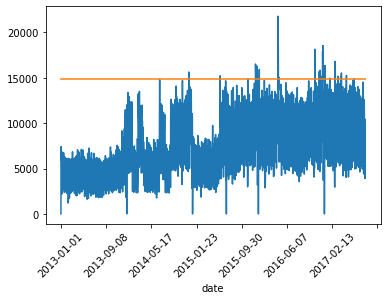

In [73]:
model_feature = LinearRegression()
model_feature.fit(transformed_df,daily_sales[target_column])

y_pred=model_feature.predict(transformed_df)

daily_sales_store_1.plot(rot=45)
plt.plot(y_pred[extended_train_df['store_nbr']==1])

In [74]:
# look at lag 1 in linear regression
daily_sales_store_1=daily_sales[daily_sales['store_nbr']==1]
daily_sales_store_1['sales_lag_1']=daily_sales_store_1['sales'].shift(1)
daily_sales_store_1

<ipython-input-74-1c08d57c58a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1['sales_lag_1']=daily_sales_store_1['sales'].shift(1)


,date,store_nbr,sales,sales_lag_1
0,2013-01-01,1,0.000000,NaN
54,2013-01-02,1,7417.148000,0.000000
108,2013-01-03,1,5873.244001,7417.148000
162,2013-01-04,1,5919.879001,5873.244001
216,2013-01-05,1,6318.785010,5919.879001
...,...,...,...,...
90666,2017-08-11,1,5403.742021,10834.579000
90720,2017-08-12,1,7543.623000,5403.742021
90774,2017-08-13,1,3902.782000,7543.623000
90828,2017-08-14,1,10433.314000,3902.782000


lag 1
correlation 0.4825820204068515


<ipython-input-75-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


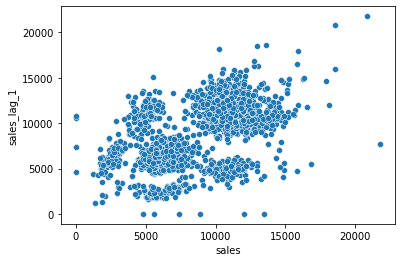

lag 2
correlation 0.4553253238666628


<ipython-input-75-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


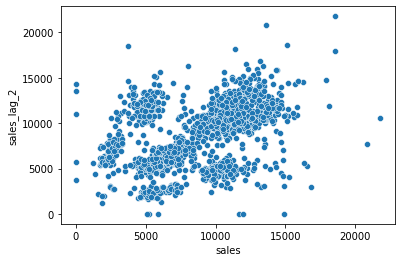

<ipython-input-75-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


lag 3
correlation 0.3585807660924557


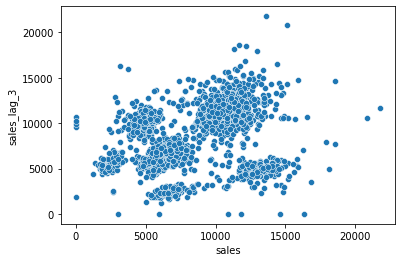

<ipython-input-75-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


lag 7
correlation 0.7920310387861091


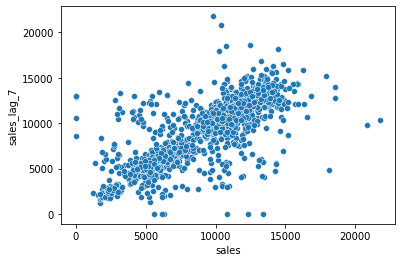

<ipython-input-75-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


lag 15
correlation 0.37527846188160435


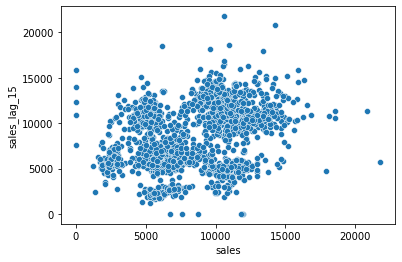

<ipython-input-75-fdfeaf0fcf84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)


lag 365
correlation 0.2372037370075466


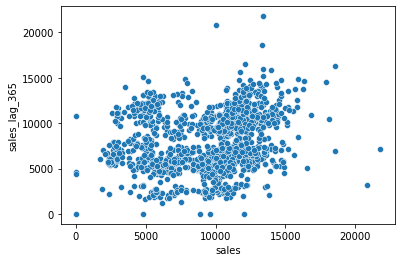

In [75]:
for lag_value in [1,2, 3,  7, 15, 365]:
  daily_sales_store_1[f'sales_lag_{lag_value}']=daily_sales_store_1['sales'].shift(lag_value)
  sns.scatterplot(data=daily_sales_store_1, x='sales', y=f'sales_lag_{lag_value}')
  print('lag', lag_value)
  correlation = daily_sales_store_1[['sales', f'sales_lag_{lag_value}']].corr().loc['sales', f'sales_lag_{lag_value}']
  print('correlation', correlation)
  plt.show()


In [131]:
data = daily_sales_store_1[['sales','sales_lag_1','sales_lag_7']].reset_index().drop(columns="index")
data[""]

,sales,sales_lag_1,sales_lag_7
0,NaN,NaN,NaN
1,7417.148000,NaN,NaN
2,-1543.903999,7417.148000,NaN
3,46.635000,-1543.903999,NaN
4,398.906009,46.635000,NaN
...,...,...,...
1679,-5430.836979,-1749.073000,3079.277960
1680,2139.880979,-5430.836979,-2762.318960
1681,-3640.841000,2139.880979,-4978.331002
1682,6530.532000,-3640.841000,6128.888002


In [121]:
model = LinearRegression()

In [122]:
X_lag = data[['sales_lag_1','sales_lag_7']].fillna(0)

In [123]:
Y = data[["sales"]]

In [124]:
model.fit(X=X_lag,y=Y)

LinearRegression()

In [134]:
y_predicted = model.predict(X_lag)
y_predicted

array([[  987.83387811],
       [  987.83387811],
       [ 2321.85313162],
       ...,
       [ 5456.13717847],
       [ 9126.36931212],
       [10676.78891758]])

In [133]:
data["prediction_sales"] = pd.Series(y_predicted[:,0])

<AxesSubplot: >

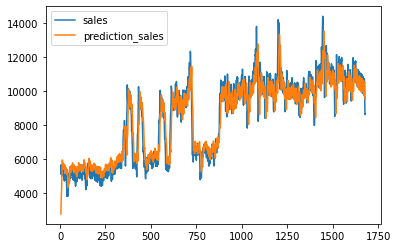

In [138]:
data[["sales",'prediction_sales']].rolling(window=10,center=True).mean().plot()

In [142]:
data["sales_normalised"] = data["sales"]/ data['prediction_sales']

<AxesSubplot: >

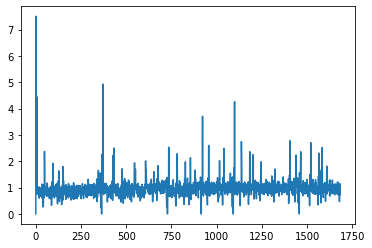

In [144]:
data.sales_normalised.plot()

<AxesSubplot: >

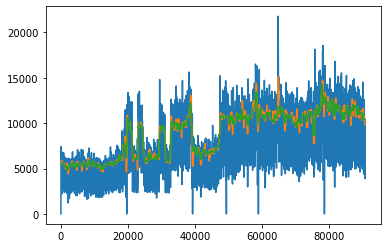

In [128]:
# plot moving average
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

daily_sales_store_1['sales'].plot(rot=45)
daily_sales_store_1['sales'].rolling(window=7,center=True).median().plot()
daily_sales_store_1['sales'].rolling(window=15,center=True).median().plot()

In [129]:
# find seasonality
# Plot monthly, biweekly sales distribution
# Plot Periodogram

In [130]:
# Perform ARIMA analysis
import statsmodels 


In [ ]:
# y = y_feature * (y_seasonality + y_trend + y_holiday + epsilon)